In [1]:
import os
import torchvision
from torchvision import datasets, transforms
from PIL import Image

# Create directories for saving the images
def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

# Define the transform to convert the data to tensors
transform = transforms.Compose([transforms.ToTensor()])

# Save images and create the txt files
def save_images_and_create_txt(dataset, output_dir, txt_filename, is_npz=False, data=None, labels=None, add_to_label=0):
    create_dir(output_dir)
    with open(txt_filename, 'w') as f:
        if is_npz:
            for idx in range(len(data)):
                img = Image.fromarray(data[idx])
                label = labels[idx]
                label_dir = os.path.join(output_dir, str(label))
                create_dir(label_dir)
                img_path = os.path.join(label_dir, f'{idx}.png')
                img.save(img_path)
                f.write(f'{os.path.abspath(img_path)}\n')
        else:
            for idx, (img, label) in enumerate(dataset):
                img = transforms.ToPILImage()(img)  # Convert tensor to PIL image
                label = label + add_to_label
                label_dir = os.path.join(output_dir, str(label))
                create_dir(label_dir)
                img_path = os.path.join(label_dir, f'{idx}.png')
                img.save(img_path)
                f.write(f'{os.path.abspath(img_path)} {label}\n')


In [4]:
# MNIST Dataset
print("Processing MNIST dataset...")
mnist_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
mnist_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Save MNIST images and create txt files
save_images_and_create_txt(mnist_train_dataset, './data/mnist_images/train', './data/mnist_train.txt', add_to_label=0)
save_images_and_create_txt(mnist_test_dataset, './data/mnist_images/test', './data/mnist_test.txt', add_to_label=0)
print("MNIST images and text files saved.")

Processing MNIST dataset...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9.91M/9.91M [00:01<00:00, 5.76MB/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28.9k/28.9k [00:00<00:00, 240kB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1.65M/1.65M [00:00<00:00, 1.97MB/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4.54k/4.54k [00:00<00:00, 3.47MB/s]


MNIST images and text files saved.


In [ ]:
# SVHN Dataset
print("Processing SVHN dataset...")
svhn_train_dataset = datasets.SVHN(root='./data/SVHN', split='train', download=True, transform=transform)
svhn_test_dataset = datasets.SVHN(root='./data/SVHN', split='test', download=True, transform=transform)

# Save SVHN images and create txt files
save_images_and_create_txt(svhn_train_dataset, './data/svhn_images/train', './data/svhn_train.txt')
save_images_and_create_txt(svhn_test_dataset, './data/svhn_images/test', './data/svhn_test.txt')

print("SVHN images and text files saved.")

In [63]:
# Load the ImageNet32 dataset from multiple NPZ files
def load_imagenet32_npz_from_batches(npz_dir, batch_count):
    data_list = []
    labels_list = []
    for i in range(0, batch_count):
        npz_path = os.path.join(npz_dir, f'train_data_batch_{i}.npz')
        data_dict = np.load(npz_path)
        data_list.append(data_dict['data'])
        labels_list.append(data_dict['labels'])
    data = np.concatenate(data_list, axis=0)
    labels = np.concatenate(labels_list, axis=0)
    
    # Reshape data to (number_of_images, 3, 32, 32) then transpose to (number_of_images, 32, 32, 3)
    data = data.reshape(-1, 3, 128, 128).transpose(0, 2, 3, 1)
    return data, labels
    
# ImageNet32 Dataset
print("Processing ImageNet32 dataset...")

# Directory containing the train NPZ files
train_npz_dir = './data/IMAGENET32/Imagenet32_train_npz'
test_npz_dir = './data/IMAGENET32/Imagenet32_test_npz'

# Load train dataset from multiple NPZ files
train_data, train_labels = load_imagenet32_npz_from_batches(train_npz_dir, batch_count=10)

# Save ImageNet32 training images and create train.txt file
save_images_and_create_txt(None, './data/imagenet32_images/train', 'imagenet32_train.txt', is_npz=True, data=train_data, labels=train_labels)

# Load test dataset from a single NPZ file
#test_data, test_labels = load_imagenet32_npz_from_batches(test_npz_dir, batch_count=1)

# Save ImageNet32 testing images and create test.txt file
#save_images_and_create_txt(None, './data/imagenet32_images/test', 'imagenet32_test.txt', is_npz=True, data=test_data, labels=test_labels)

print("MNIST, SVHN, and ImageNet32 images and text files saved.")

Processing ImageNet32 dataset...
MNIST, SVHN, and ImageNet32 images and text files saved.


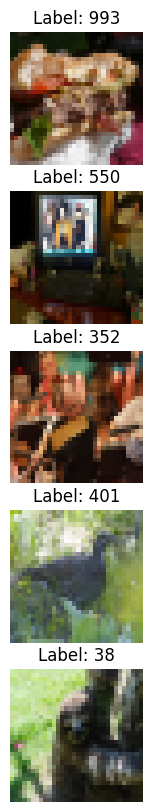

In [61]:
import matplotlib.pyplot as plt

def display_images_from_npz(data, labels, num_images=5):
    """
    Display a few images from the NPZ data for debugging purposes.
    
    Parameters:
    - data: numpy array of image data
    - labels: numpy array of labels
    - num_images: number of images to display
    """
    plt.figure(figsize=(10, 2*num_images))
    for i in range(num_images):
        img = data[i]
        label = labels[i]
        plt.subplot(num_images, 1, i+1)
        plt.imshow(img)
        plt.title(f'Label: {label}')
        plt.axis('off')
    plt.show()

# Example usage with the loaded ImageNet32 data
# Assuming `train_data` and `train_labels` have been loaded as before
# train_data, train_labels = load_imagenet32_npz_from_batches(train_npz_dir, batch_count=10)
display_images_from_npz(train_data, train_labels, num_images=5)


In [56]:
import matplotlib.pyplot as plt
import numpy as np
# functions to show an image
def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    #npimg = img.numpy()
    npimg = img
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    

In [54]:
#Testing if MNIST done it well
print(mnist_train_dataset.data[0].shape)
image, label = mnist_train_dataset[0]
print(image.shape)
print(label)
imshow(image)

torch.Size([28, 28])
torch.Size([1, 28, 28])
5


NameError: name 'npimg' is not defined

(3, 32, 32)
1


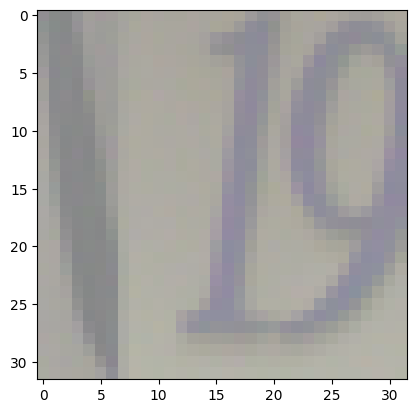

In [21]:
#Testing if MNIST done it well
print(svhn_train_dataset.data[0].shape)
image, label = svhn_train_dataset[0]
print(label)
imshow(image)